## Trabalho TACD
#### Nome: Rian Freitas da Silva
#### Número: 140983

Aqui encontram-se as respostas referentes à lista A1 da matéria de Técnicas e Algoritmos em Ciência de Dados.

In [3]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

##### Parte 1

A) Carregando em um Pandas DataFrame

In [4]:
db = pd.read_csv("diamonds.csv")

db

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


B) Removendo registros vazios ou duplicados

In [5]:
pd.DataFrame.dropna(db, inplace=True)
pd.DataFrame.drop_duplicates(db, inplace=True)

db

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


C) Construindo os histogramas

In [8]:
def plot_hists(feature):

    # Just to ensure the variable inserted is really a feature, not a datapoint component
    if feature not in {'x','y','z'}:
        fig, ax =plt.subplots(1,2, figsize=(15,5))
        sns.histplot(diamonds_db, x=feature, stat='density', bins=50, ax=ax[0])
        sns.histplot(diamonds_db, x=feature, hue='cut', palette='viridis', stat='density', bins=50, ax=ax[1])
    else:
        raise TypeError("Insert a dataset feature, datapoint components are not acceptable.")

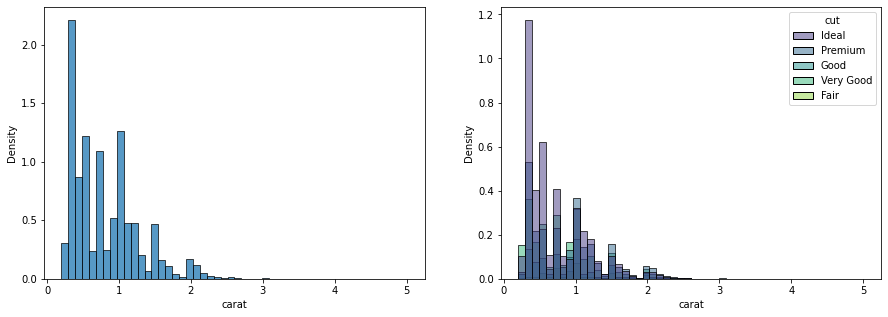

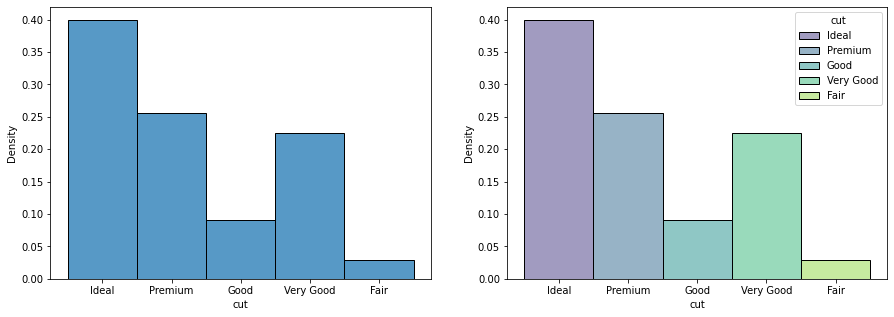

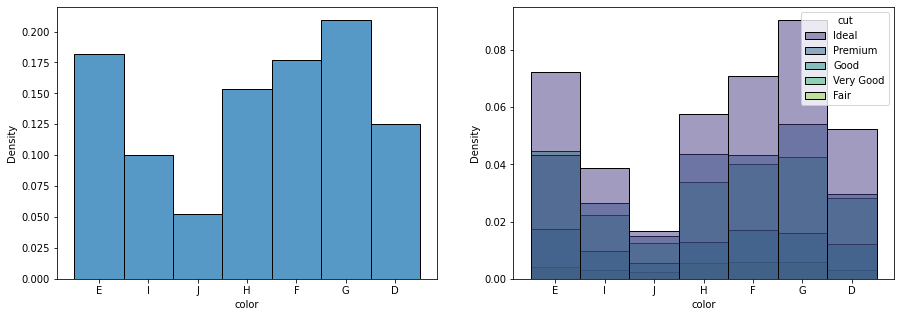

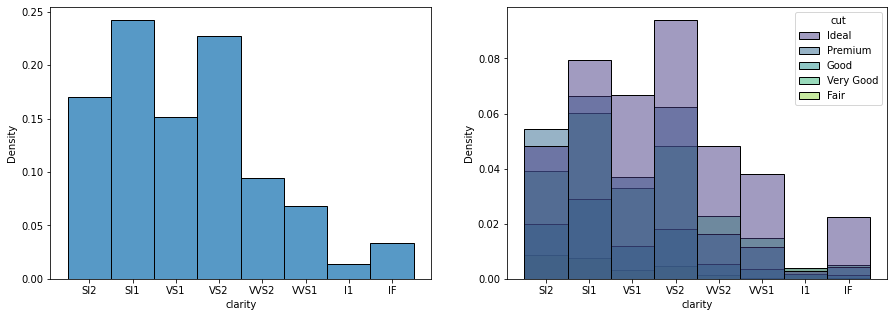

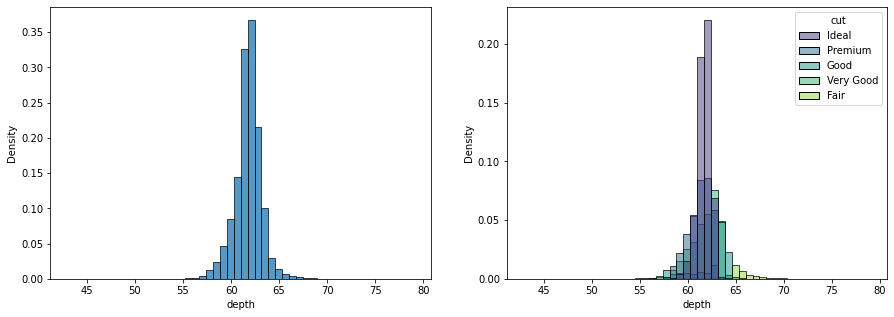

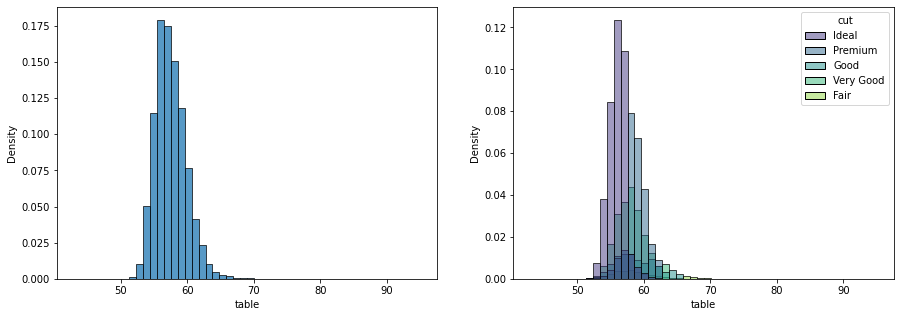

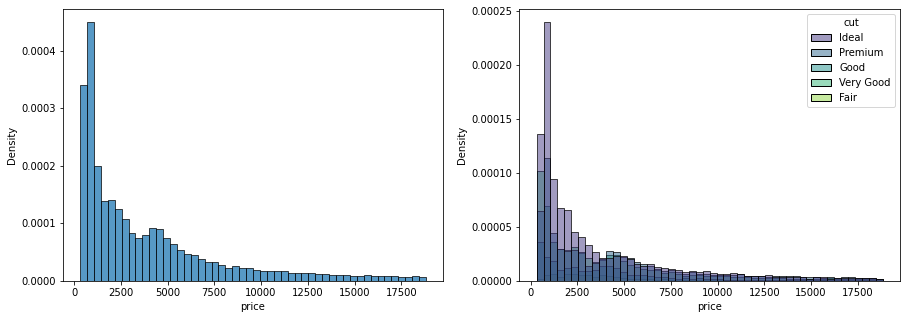

In [9]:
for feature in db.columns:
    if feature not in {'x','y','z'}:
        plot_hists(feature)

D) Montando a matriz de subplots

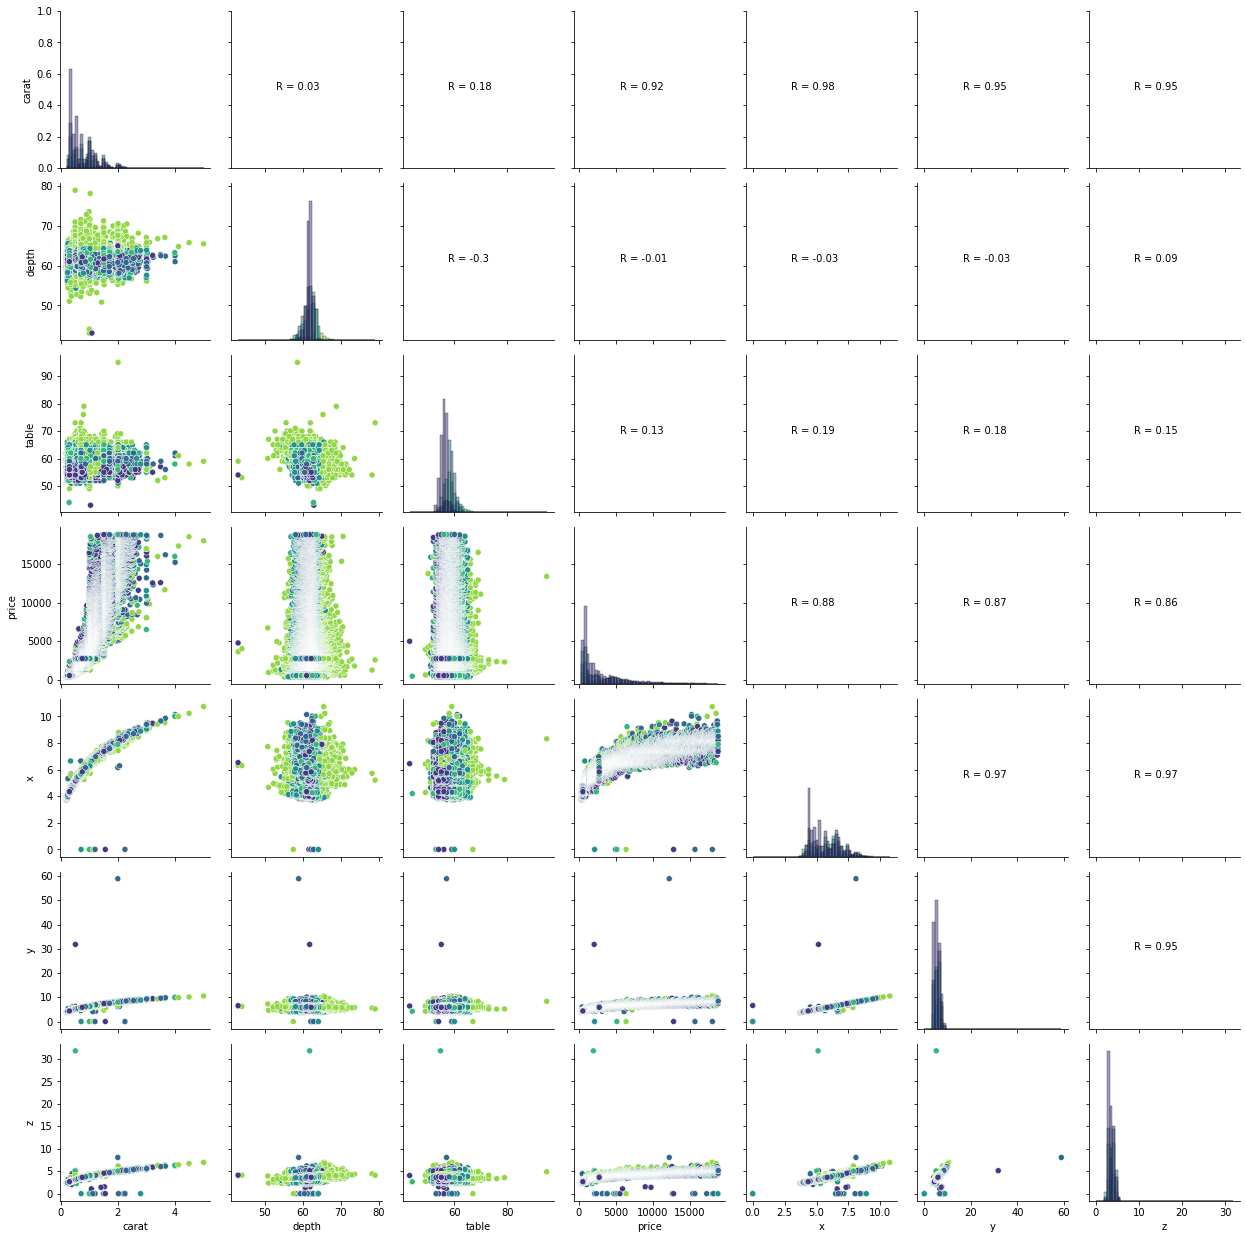

In [9]:
def correlate(x,y, **kwargs):
    pearsoncorr = np.corrcoef(db[x.name], db[y.name])[0][1]
    label = f'R = {round(pearsoncorr, 2)}'
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 0.5), size=10, xycoords=ax.transAxes, backgroundcolor='white')

g = sns.PairGrid(db, hue='cut', palette='viridis')
g.map_diag(sns.histplot, bins=50)
g.map_lower(sns.scatterplot)
g.map_upper(correlate)
g.add_legend;